This is for mapping the output from macebase2 analysis. This is a test notebook

```sql
select a.*, b.species_code, b.sum_ints
from
(select interval, species_code, sum(numbers_nm2) as sum_ints, ship, survey
from analysis_results_by_length
where survey = 201701 and ship = 175 
group by ship, survey, species_code, interval order by interval) b
join
(select * from intervals) a
on a.ship = b.ship and a.survey = b.survey and a.interval = b.interval
order by a.interval
```

In [2]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rcParams
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#import cmocean
from cartopy.feature import NaturalEarthFeature
%matplotlib inline

In [ ]:
cod2017 = pd.read_csv('C:/Users/Robert/Downloads/export0705.csv')
fig = plt.figure(figsize=(15,8))
plt.subplot(131)
plt.scatter(cod2017.START_LONGITUDE, cod2017.START_LATITUDE, cod2017.SUM_INTS/1852/1852, c = cod2017.SUM_INTS/1852/1852, vmin=0.1, vmax = 10,cmap='jet')
plt.axis([-170, -150, 66.5, 73])
np.mean(cod2017.SUM_INTS[cod2017.START_LATITUDE > 69.5]/(1852*1852))

In [10]:
cod2017 = pd.read_csv('C:/Users/robert.levine/work/analysisExport2017_3.csv')
#cod2017 = cod2017[(cod2017.SPECIES_CODE == 21744) | (cod2017.SPECIES_CODE == 21740)]
cod2017 = cod2017[(cod2017.SPECIES_CODE == 21725)]
cod2019 = pd.read_csv('C:/Users/robert.levine/work/analysisExport2019_2.csv')
#cod2019 = cod2019[(cod2019.SPECIES_CODE == 21744) | (cod2019.SPECIES_CODE == 21740)]
cod2019 = cod2019[(cod2019.SPECIES_CODE == 21725)]
cod2012 = pd.read_csv('G:/Chukchi_Sea/Analysis_Output_Data/Final_Exports_after_selectivity_correction_011620/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2012_v2.csv')
cod2013 = pd.read_csv('G:/Chukchi_Sea/Analysis_Output_Data/Final_Exports_after_selectivity_correction_011620/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2013_v2.csv')

(-170.0, -150.0, 66.5, 73.0)

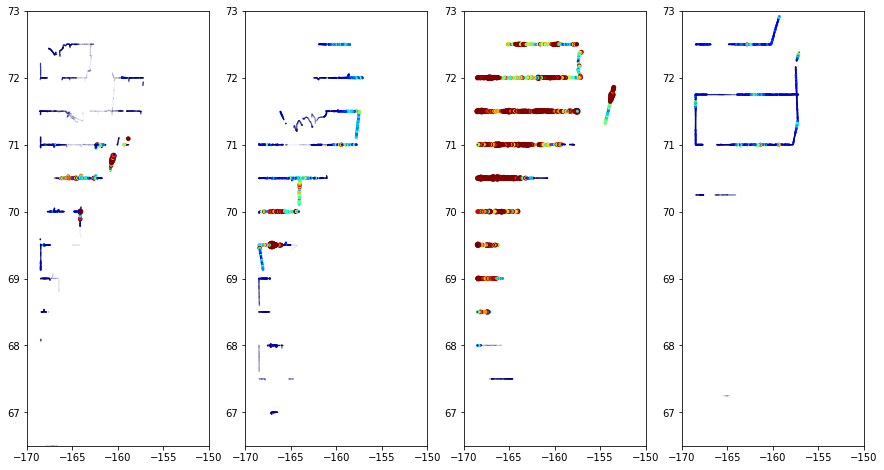

In [11]:
fig = plt.figure(figsize=(15,8))
plt.subplot(141)
plt.scatter(cod2012.Longitude, cod2012.Latitude, cod2012['Arctic cod (No. m^-2)'], c = cod2012['Arctic cod (No. m^-2)'], vmin=0.1, vmax = 10,cmap='jet')
plt.axis([-170, -150, 66.5, 73])
plt.subplot(142)
plt.scatter(cod2013.Longitude, cod2013.Latitude, cod2013['Arctic cod (No. m^-2)'], c = cod2013['Arctic cod (No. m^-2)'], vmin=0.1, vmax = 10,cmap='jet')
plt.axis([-170, -150, 66.5, 73])
plt.subplot(143)
plt.scatter(cod2017.START_LONGITUDE, cod2017.START_LATITUDE, cod2017.SUM_INTS/1852/1852, c = cod2017.SUM_INTS/1852/1852, vmin=0.1, vmax = 10,cmap='jet')
plt.axis([-170, -150, 66.5, 73])
plt.subplot(144)
plt.scatter(cod2019.START_LONGITUDE, cod2019.START_LATITUDE, cod2019.SUM_INTS/1852/1852, c = cod2019.SUM_INTS/1852/1852, vmin=0.1, vmax = 10,cmap='jet')
plt.axis([-170, -150, 66.5, 73])

In [12]:
etopo1name = 'C:/Users/robert.levine/work/repositories/ArcticEISII/saildrone/code/acousticData/analysis/etopo1_bedrock.asc'
topo_file = open(etopo1name, 'r')
ncols = int(topo_file.readline().split()[1])
nrows = int(topo_file.readline().split()[1])
xllcorner = float(topo_file.readline().split()[1])
yllcorner = float(topo_file.readline().split()[1])
cellsize = float(topo_file.readline().split()[1])
topo_file.close()
dres = 1
etopo = np.loadtxt(etopo1name, skiprows=5)
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-500,2251,100) # check etopo.ravel().max()
#lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=cm.terrain)
#olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
olevels1 = [-200,-150,-100,-50,0]
olevels2 = [-2000,-1500,-1000,-500]
olevels3 = [0,10000]
olevels4 = [0]
rlons, rlats = (np.meshgrid(lons[:-1],lats[:-1]))

C:\Users\robert.levine\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\robert.levine\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\robert.levine\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


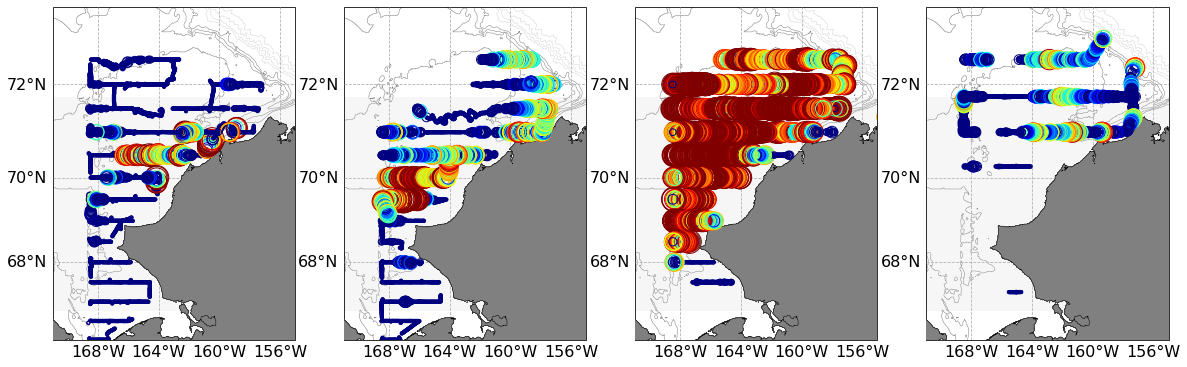

In [13]:
figure = plt.figure(figsize=(20,20))
rlons, rlats = (np.meshgrid(lons[:-1],lats[:-1]))
rcParams['contour.negative_linestyle'] = 'solid'
rcParams['lines.linewidth'] = .5

ax1=plt.subplot(143,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
c = plt.cm.jet(np.log10(cod2017.SUM_INTS/1852/1852))
a = ax1.scatter(cod2017.START_LONGITUDE, cod2017.START_LATITUDE,s=10+(20**2*(np.log10(cod2017.SUM_INTS/1852/1852+1))),facecolors='None',edgecolors = c,transform=ccrs.PlateCarree(),cmap='jet',zorder=6)
s = a.set_clim([-3,2])

lfill = ax1.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
cso1 = ax1.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
cso2 = ax1.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso4 = ax1.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
ax1.set_extent([-155,-171,66,73.5])
rect =Rectangle((-171, 66.75),16,5,edgecolor='None',facecolor='lightgrey', alpha=0.2,transform=ccrs.PlateCarree())
ax1.add_patch(rect)

ax1=plt.subplot(144,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
c = plt.cm.jet(np.log10(cod2019.SUM_INTS/1852/1852))
a = ax1.scatter(cod2019.START_LONGITUDE, cod2019.START_LATITUDE,s=10+(20**2*(np.log10(cod2019.SUM_INTS/1852/1852+1))),facecolors='None',edgecolors = c,transform=ccrs.PlateCarree(),cmap='jet',zorder=6)
s = a.set_clim([-3,2])

lfill = ax1.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
cso1 = ax1.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
cso2 = ax1.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso4 = ax1.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
ax1.set_extent([-155,-171,66,73.5])
rect =Rectangle((-171, 66.75),16,5,edgecolor='None',facecolor='lightgrey', alpha=0.2,transform=ccrs.PlateCarree())
ax1.add_patch(rect)

ax1=plt.subplot(141,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
c = plt.cm.jet(np.log10(cod2012['Arctic cod (No. m^-2)']))
a = ax1.scatter(cod2012.Longitude, cod2012.Latitude,s=10+(20**2*(np.log10(cod2012['Arctic cod (No. m^-2)']+1))),facecolors='None',edgecolors = c,transform=ccrs.PlateCarree(),cmap='jet',zorder=6)
s = a.set_clim([-3,2])

lfill = ax1.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
cso1 = ax1.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
cso2 = ax1.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso4 = ax1.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
ax1.set_extent([-155,-171,66,73.5])
rect =Rectangle((-171, 66.75),16,5,edgecolor='None',facecolor='lightgrey', alpha=0.2,transform=ccrs.PlateCarree())
ax1.add_patch(rect)

ax1=plt.subplot(142,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
c = plt.cm.jet(np.log10(cod2013['Arctic cod (No. m^-2)']))
a = ax1.scatter(cod2013.Longitude, cod2013.Latitude,s=10+(20**2*(np.log10(cod2013['Arctic cod (No. m^-2)']+1))),facecolors='None',edgecolors = c,transform=ccrs.PlateCarree(),cmap='jet',zorder=6)
s = a.set_clim([-3,2])

lfill = ax1.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
cso1 = ax1.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
cso2 = ax1.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso4 = ax1.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
ax1.set_extent([-155,-171,66,73.5])
rect =Rectangle((-171, 66.75),16,5,edgecolor='None',facecolor='lightgrey', alpha=0.2,transform=ccrs.PlateCarree())
ax1.add_patch(rect)

In [14]:
display(np.mean(cod2012['Arctic cod (No. m^-2)'][cod2012.Latitude > 69.5]),\
    np.mean(cod2013['Arctic cod (No. m^-2)'][cod2013.Latitude > 69.5]),\
        np.mean(cod2017.SUM_INTS[cod2017.START_LATITUDE > 69.5]/(1852*1852)),\
        np.mean(cod2019.SUM_INTS[cod2019.START_LATITUDE > 69.5]/(1852*1852)))

0.6026773021604025

2.402102077814779

9.266086603917364

1.1007542981530374

In [15]:
cod2019 = pd.read_csv('C:/Users/robert.levine/work/analysisExport2019.csv')
cod2019p = cod2019[(cod2019.SPECIES_CODE == 21740) | (cod2019.SPECIES_CODE == 21744)]
cod2019a = cod2019[cod2019.SPECIES_CODE == 21725]

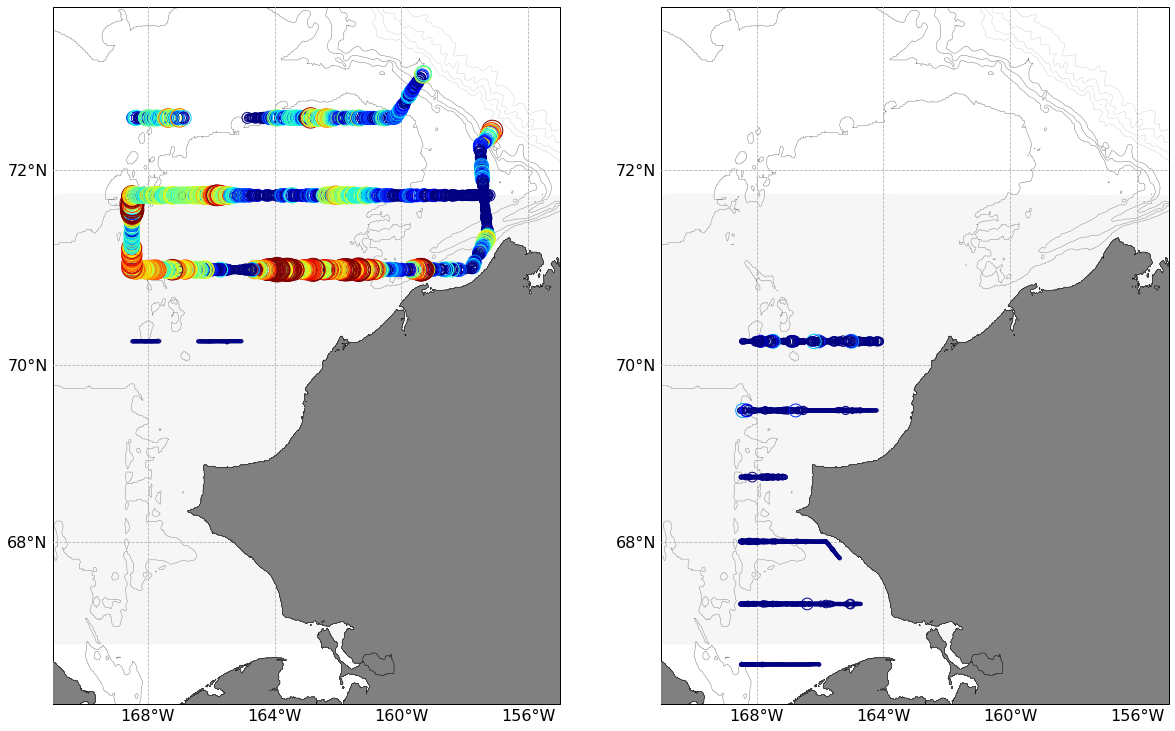

In [16]:
figure = plt.figure(figsize=(20,20))
rlons, rlats = (np.meshgrid(lons[:-1],lats[:-1]))
rcParams['contour.negative_linestyle'] = 'solid'
rcParams['lines.linewidth'] = .5

ax1=plt.subplot(121,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
c = plt.cm.jet(np.log10(cod2019a.SUM_INTS/1852/1852))
a = ax1.scatter(cod2019a.START_LONGITUDE, cod2019a.START_LATITUDE,s=10+(20**2*(np.log10(cod2019a.SUM_INTS/1852/1852+1))),facecolors='None',edgecolors = c,transform=ccrs.Geodetic(),cmap='jet',zorder=6)
s = a.set_clim([-3,2])

lfill = ax1.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
cso1 = ax1.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
cso2 = ax1.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso4 = ax1.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
ax1.set_extent([-155,-171,66,73.5])
rect =Rectangle((-171, 66.75),16,5,edgecolor='None',facecolor='lightgrey', alpha=0.2,transform=ccrs.Geodetic())
ax1.add_patch(rect)

ax1=plt.subplot(122,projection=ccrs.Mercator())
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
c = plt.cm.jet(np.log10(cod2019p.SUM_INTS/1852/1852))
a = ax1.scatter(cod2019p.START_LONGITUDE, cod2019p.START_LATITUDE,s=10+(20**2*(np.log10(cod2019p.SUM_INTS/1852/1852+1))),facecolors='None',edgecolors = c,transform=ccrs.Geodetic(),cmap='jet',zorder=6)
s = a.set_clim([-3,2])

lfill = ax1.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
cso1 = ax1.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
cso2 = ax1.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso4 = ax1.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
ax1.set_extent([-155,-171,66,73.5])
rect =Rectangle((-171, 66.75),16,5,edgecolor='None',facecolor='lightgrey', alpha=0.2,transform=ccrs.Geodetic())
ax1.add_patch(rect)

In [20]:
display(np.mean(cod2019a.SUM_INTS/(1852*1852)),\
        np.mean(cod2019p.SUM_INTS/(1852*1852)))

2.70490094016773

0.09851627511622298

In [49]:
display('Reallocating "arctic cod" west of -165 to pollock', 'Arctic cod:',\
        np.mean(cod2019a.SUM_INTS[cod2019a.START_LONGITUDE > -165]/(1852*1852)),\
        'Pollock:',np.mean(np.concatenate([cod2019a.SUM_INTS[cod2019a.START_LONGITUDE > -165],cod2019p.SUM_INTS])/(1852*1852)))

'Reallocating "arctic cod" west of -165 to pollock'

'Arctic cod:'

2.5764523304836096

'Pollock:'

1.2861095436963474